In [6]:
from dotenv import load_dotenv
import earthaccess
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np
import sys
from pathlib import Path
import xarray as xr
sys.path.append("../modules/")
from emit_tools import emit_xarray

In [3]:
# earthdataにログイン
load_dotenv()
earthaccess.login(strategy="environment", persist=True)

In [2]:
l2a_path = "../../data/registration_test/EMIT_L2A_RFL_001_20241020T170504_2429411_003.nc"
l2benh_path = "../../data/registration_test/EMIT_L2B_CH4ENH_001_20241020T170504_2429411_003.tif"
l2bplm_path = "../../data/registration_test/EMIT_L2B_CH4PLM_001_20241020T170504_003677.tif"

In [4]:
# l2bplm
l2bplm = rasterio.open(l2bplm_path)
l2bplm_data = l2bplm.read(1)
l2bplm_data[l2bplm_data != -9999]

array([  394.0316 ,  -451.6389 ,  1009.10754, ...,   623.708  ,
         623.708  , -1025.7479 ], dtype=float32)

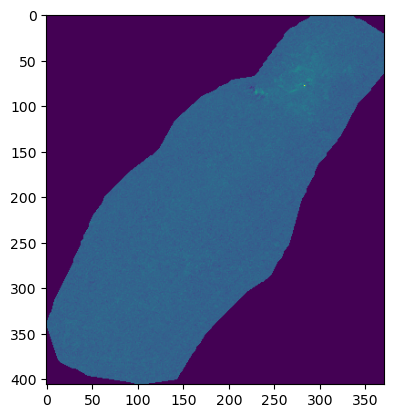

In [5]:
import matplotlib.pyplot as plt
plt.imshow(l2bplm_data)

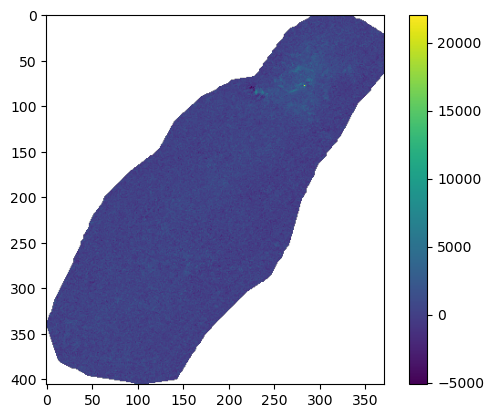

In [10]:
import numpy as np
import matplotlib.pyplot as plt

masked_data = np.ma.masked_equal(l2bplm_data, -9999)
plt.imshow(masked_data)
plt.colorbar()
plt.show()

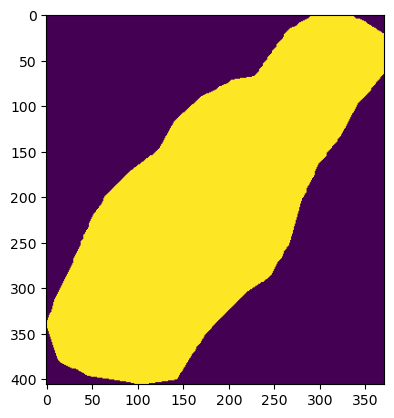

In [7]:
plt.imshow(l2bplm_data != -9999)

(array([[403.,   0.,   0., ...,   0.,   0.,   0.],
        [397.,   0.,   2., ...,   0.,   0.,   0.],
        [391.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [358.,   0.,  15., ...,   0.,   0.,   0.],
        [360.,   0.,  16., ...,   0.,   0.,   0.],
        [361.,   0.,  13., ...,   0.,   0.,   0.]]),
 array([-9999.        , -6794.40136719, -3589.80322266,  -385.2046814 ,
         2819.39379883,  6023.9921875 ,  9228.59082031, 12433.18945312,
        15637.78710938, 18842.38671875, 22046.984375  ]),
 <a list of 371 BarContainer objects>)

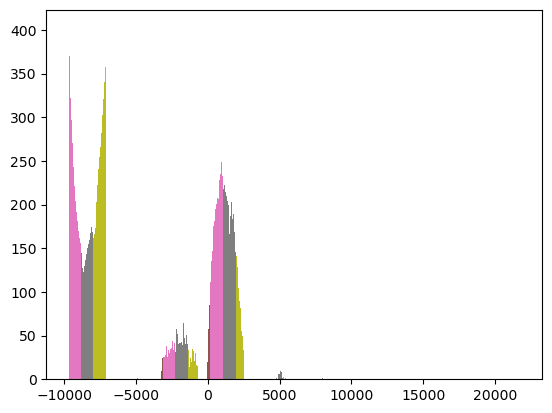

In [8]:
plt.hist(l2bplm_data)

In [9]:
import cv2

In [ ]:
cv2.resize(l2bplm_data, (100, 100))

In [1]:
l2a_uncert_path = "../../data/registration_test/EMIT_L2A_RFLUNCERT_001_20241020T170504_2429411_003.nc"
l2a_mask_path = "../../data/registration_test/EMIT_L2A_MASK_001_20241020T170504_2429411_003.nc"

In [8]:
# uncertを開く
l2a_uncert = xr.open_dataset(l2a_uncert_path)
l2a_mask = xr.open_dataset(l2a_mask_path)

In [16]:
uncert = l2a_uncert["reflectance_uncertainty"].values
type(uncert)

numpy.ndarray

In [15]:
l2a_mask

<xarray.Dataset> Size: 280MB
Dimensions:    (downtrack: 1280, crosstrack: 1242, bands: 8,
                packed_wavelength_bands: 36)
Dimensions without coordinates: downtrack, crosstrack, bands,
                                packed_wavelength_bands
Data variables:
    mask       (downtrack, crosstrack, bands) float32 51MB 0.0 0.0 ... 1.101 0.0
    band_mask  (downtrack, crosstrack, packed_wavelength_bands) float32 229MB ...
Attributes: (12/38)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             33.62839491966192
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-8.51101770e+01  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Masks 60 m V001